In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [ ]:
ROCK, PAPER, SCISSORS = 0,1,2
moves = [ROCK, PAPER, SCISSORS]
NUM_ACTIONS = 3
oppStrategy = np.array([0.4, 0.3, 0.3])

def value(p1, p2):
  if p1==p2:
    return 0
  elif p1==ROCK and p2==SCISSORS:
    return 1
  elif p1==SCISSORS and p2==PAPER:
    return 1
  elif p1==PAPER and p2==ROCK:
    return 1
  else:
    return -1

In [ ]:
def normalize(strategy):
  strategy = np.copy(strategy)
  normalizingSum = np.sum(strategy)
  if normalizingSum > 0:
    strategy /= normalizingSum
  else:
    strategy = np.ones(strategy.shape[0])/(strategy.shape[0])
  return strategy

# accumulates in strategySum
def getStrategy(regretSum):
  #Get current mixed strategy through regret-matching
  #the strategy you use is the one with maximum regret
  return normalize(np.maximum(regretSum, 0))


def getAction(strategy):
  #Get random action according to mixed-strategy distribution
  strategy = strategy/np.sum(strategy) #normalize
  return np.searchsorted(np.cumsum(strategy), random.random())

In [ ]:
def vectorising(ndarray):
  arr = []
  for i in ndarray:
    print(i)
    arr.append(i)
  print(arr)

In [ ]:
# import numpy as np

def calculate_deviation(matrix1):
    matrix2 = [0.33333333, 0.33333333, 0.33333333]
    difference = []
    for i in range(0, 3):
      difference.append(matrix1[i] - matrix2[i])
    deviation = np.linalg.norm(difference)
    return deviation

# # Example usage
# matrix1 = np.array([[0.3], [0.4], [0.3]])
# matrix2 = np.array([[0.333], [0.333], [0.333]])

# deviation = calculate_deviation(matrix1, matrix2)
# print("Deviation:", deviation)


In [ ]:
calculate_deviation([0.333, 0.333, 0.333])

0.0005773444956868733

In [ ]:

def inner_train(regretSum, strategySum, oppStrategy):
    #accumulate the current strategy based on regret
    strategy = getStrategy(regretSum)
    strategySum += strategy

    #select my action and opponent action
    myAction = getAction(strategy)
    oppAction = getAction(oppStrategy)
    # we compute the utility of each possible action from the perspective of the player playing myAction

    #for rock, paper, scissors
    actionUtility = np.zeros(NUM_ACTIONS)
    actionUtility[oppAction] = 0
    actionUtility[(oppAction+1) % NUM_ACTIONS] = 1
    actionUtility[(oppAction-1) % NUM_ACTIONS] = -1
    #acc
    regretSum += actionUtility - actionUtility[myAction]
    return regretSum, strategySum


def train(iterations):
  regretSum = np.zeros(NUM_ACTIONS)
  strategySum = np.zeros(NUM_ACTIONS)
  oppStrategy = np.array([0.4, 0.3, 0.3])

  for i in range(iterations):
    regretSum, strategySum = inner_train(regretSum, strategySum, oppStrategy)

  return strategySum

def train2p(oiterations, iterations):
  strategySumP1 = np.zeros(NUM_ACTIONS)
  strategySumP2 = np.zeros(NUM_ACTIONS)

  for j in range(oiterations):
    oppStrategy = normalize(strategySumP2)
    regretSumP1 = np.zeros(NUM_ACTIONS)
    for i in range(iterations):
      regretSumP1, strategySumP1 = inner_train(regretSumP1, strategySumP1, oppStrategy)

    oppStrategy = normalize(strategySumP1)
    regretSumP2 = np.zeros(NUM_ACTIONS)
    for i in range(iterations):
      regretSumP2, strategySumP2 = inner_train(regretSumP2, strategySumP2, oppStrategy)
    LIST_LEARNT.append((normalize(strategySumP1)))
    print(normalize(strategySumP1), normalize(strategySumP2))

  return strategySumP1, strategySumP2

# s1, s2 = train2p(100, 1000)
# normalize(s1), normalize(s2)

Nash Equilibrium reached

In [ ]:
def averaging_for_curve(norm_score):
  diff = norm_score - [0.3333, 0.3333, 0.3333]
  sum_of_diff = 0
  for i in diff:
    sum_of_diff += i
  avg = (sum_of_diff/3)*100
  return avg

In [ ]:
np.ones(3)

array([1., 1., 1.])

In [ ]:
LIST_LEARNT = []
s1, s2 = train2p(1500, 1000)
normalize(s1), normalize(s2)

[0.01762098 0.91357522 0.06880381] [0.00033333 0.00033333 0.99933333]
[0.50808549 0.45695428 0.03496024] [0.0005 0.4995 0.5   ]
[0.33883477 0.30474729 0.35641794] [0.20876374 0.41207511 0.37916115]
[0.25891556 0.22872714 0.5123573 ] [0.40297723 0.30918133 0.28784143]
[0.22349556 0.36648526 0.41001917] [0.34894394 0.25641347 0.39464259]
[0.3524963 0.3057655 0.3417382] [0.42109538 0.2497858  0.32911882]
[0.4238688  0.28316512 0.29296608] [0.36636747 0.35148307 0.28214947]
[0.37139006 0.37025816 0.25835178] [0.32088403 0.41376783 0.26534813]
[0.33634887 0.42767999 0.23597114] [0.28587716 0.45165817 0.26246467]
[0.30290287 0.38536167 0.31173546] [0.27463478 0.41961492 0.3057503 ]
[0.275442  0.3503591 0.3741989] [0.2563385  0.38374321 0.35991829]
[0.25434733 0.32519655 0.42045611] [0.27997631 0.35179238 0.3682313 ]
[0.23777769 0.30021135 0.46201096] [0.28217075 0.32477844 0.39305081]
[0.22514172 0.27893435 0.49592393] [0.33277761 0.30182998 0.36539241]
[0.27573894 0.26098761 0.46327345] [0.

(array([0.34520742, 0.33088135, 0.32391122]),
 array([0.33194958, 0.32718676, 0.34086366]))

In [ ]:
strategySum = train(10000)
normalize(strategySum)

# which makes sense for our opp's strategy. should have been (0,1,0)

array([0.0065947 , 0.99044998, 0.00295532])

In [ ]:
strategy, oppStrategy = normalize(s1), normalize(s2)
strategy, oppStrategy
#nash equilibrium

(array([0.33492138, 0.34788426, 0.31719436]),
 array([0.32623651, 0.31951245, 0.35425103]))

In [ ]:
# define a function to simulate a game of Rock Paper Scissors
def play(player1, player2):
    if player1 == player2:
        return 'draw'
    elif (player1 == 'rock' and player2 == 'scissors') or \
         (player1 == 'paper' and player2 == 'rock') or \
         (player1 == 'scissors' and player2 == 'paper'):
        return 'player1 wins'
    else:
        return 'player2 wins'

# define a function to generate a random move
def random_move():
    return random.choice(moves)

def random_game():
    player1 = random_move()
    player2 = random_move()
    return play(player1, player2)


In [ ]:
def simulate(num_games):
    wins = 0
    draws = 0
    for i in range(num_games):
        result = random_game()
        if result == 'player1 wins':
            wins += 1
        elif result == 'draw':
            draws += 1
    win_ratio = wins / num_games
    draw_ratio = draws / num_games
    return win_ratio, draw_ratio

([<matplotlib.lines.Line2D at 0x7fb0a2dccfd0>], -2.76)

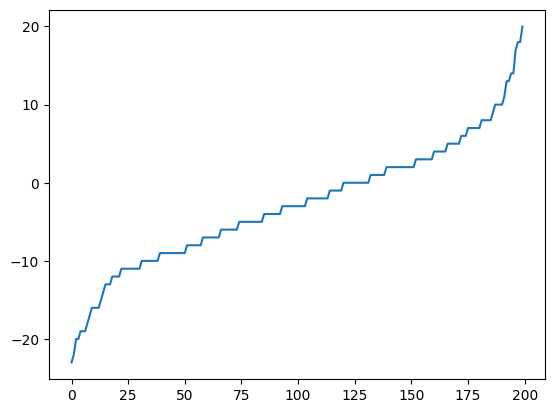

In [ ]:
vvv = []
for j in range(200):
  vv = 0
  for i in range(100):
    strategy = normalize(strategySum)
    #strategy = np.array([0,1,0]) - our intuitive solution to opp's strategy of 0.4, 0.3, 0.3
    myAction = getAction(strategy)
    oppAction = getAction(oppStrategy)
    #regret of myAction vs oppAction utilities
    vv += value(myAction, oppAction)
  vvv.append(vv)

plt.plot(sorted(vvv)), np.mean(vvv)

In [ ]:
#LIST_LEARNT
deviations_final = []
for i in LIST_LEARNT:
  dev = calculate_deviation(i)
  deviations_final.append(dev)

deviations_final

[0.6012981947455529,
 0.3947006721088685,
 0.0753290631745137,
 0.22416777806979507,
 0.13402551793749706,
 0.027500882958608322,
 0.09502674790060271,
 0.04777017095641623,
 0.053317765207463265,
 0.06691627183013138,
 0.10696598474187936,
 0.07005397124847765,
 0.04398173596946055,
 0.04058792118792318,
 0.06334307556650842,
 0.07665875863683165,
 0.09609989086939945,
 0.06252712429447588,
 0.05299383158254963,
 0.03289469562019653,
 0.02563678854492659,
 0.05342729603359467,
 0.07471270995529991,
 0.1041935100160627,
 0.09392209763617095,
 0.08070276273454471,
 0.07378574521218062,
 0.06915314567384635,
 0.06673203387461049,
 0.07789001021751539,
 0.06105948891988774,
 0.03692724006972402,
 0.022724173637337603,
 0.028150930089378596,
 0.041302102082273535,
 0.059189701261258505,
 0.05669329011822997,
 0.05057217048780644,
 0.05836020802886719,
 0.05398421043953244,
 0.05579593285950817,
 0.06347743702583063,
 0.06693472015203382,
 0.058716676136779035,
 0.06303244510654718,
 0.0558

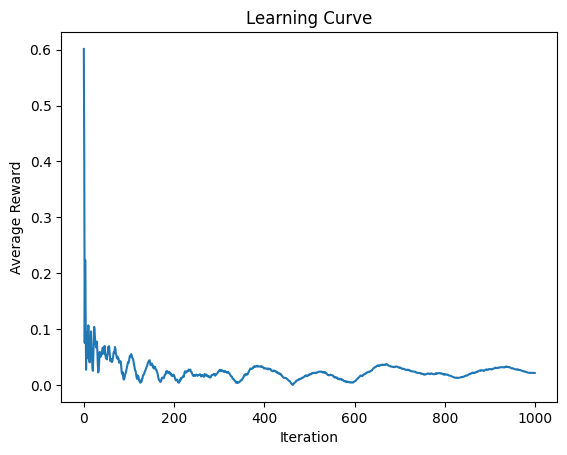

In [ ]:
import matplotlib.pyplot as plt

plt.plot(deviations_final)
plt.xlabel('Iteration')
plt.ylabel('Average Reward')
plt.title('Learning Curve')
plt.show()